Importing the essential libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import neattext.functions as nfx

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kassi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kassi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Importing the train dataset:

In [2]:
import os
dir = os.getcwd()
os.chdir("..")

train_data = pd.read_csv("datasets/train.txt", sep = ';')
os.chdir(dir)

View the summary of our train dataset:

In [3]:
train_data.shape

(16000, 2)

In [4]:
train_data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
train_data.describe()

,text,emotion
count,16000,16000
unique,15969,6
top,i feel on the verge of tears from weariness i ...,joy
freq,2,5362


View the number of categories in the categorical variable **emotion**:

In [6]:
train_data["emotion"].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

Let us attempt to plot a countplot to visualize the data:

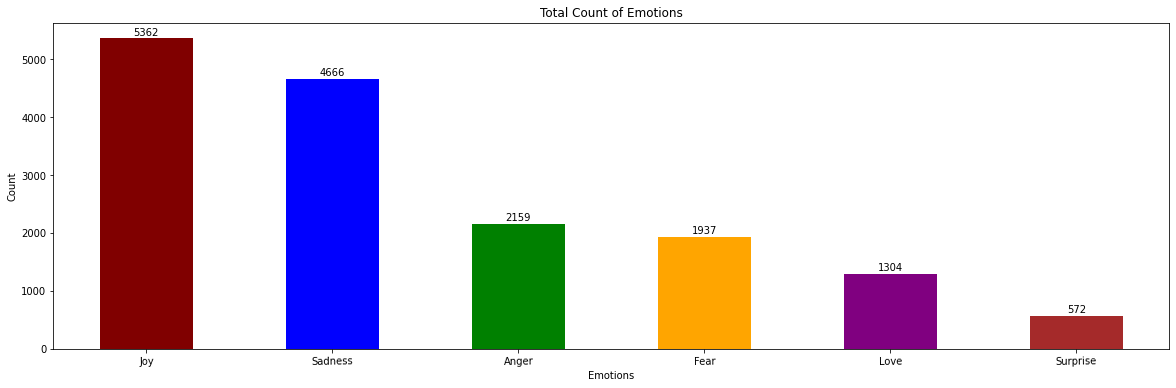

In [7]:
emotions = train_data["emotion"].value_counts()
plt.figure(figsize=(20, 6))
ax = emotions.plot(kind='bar', rot=1, color=['maroon', 'blue', 'green', 'orange', 'purple', 'brown'])
ax.set_title("Total Count of Emotions", y = 1)
ax.set_xlabel('Emotions')
ax.set_ylabel('Count')
ax.set_xticklabels(('Joy', 'Sadness','Anger', 'Fear','Love', 'Surprise'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

From the visualization, we see that there are a total of **6** different emotions in the given dataset. <br>
The visualisation above shows the different emotions in descending order of amount.

Now we begin to clean our dataset:
1) Removed stopwords and userhandles
2) Removed characters that are not alphabets
3) Performed  lemmatization on each word. Lemma is a base form of a word. For Example, run, runs and runnings are forms of the same lexemme where run is the lemma.
4) Changed the alphabets to lowercase

In [8]:
train_data['clean_text'] = train_data['text'].apply(nfx.remove_stopwords)
train_data['clean_text'] = train_data['clean_text'].apply(nfx.remove_userhandles)
lm = WordNetLemmatizer()
custom_stopwords = ['ive', 'im']
cleaned_data = []

for sentence in train_data['clean_text']:
    sentence = re.sub('[^a-zA-Z]',' ',str(sentence))
    sentence = sentence.split()
    sentence= [lm.lemmatize(word) for word in sentence if word not in set(stopwords.words('english'))]
    sentence = " ".join(t for t in sentence if t.lower() not in custom_stopwords)
    cleaned_data.append(''.join(str(x) for x in sentence))

train_data['clean_text'] = cleaned_data

Let us view the cleaned data compared to the original data given:

In [26]:
print(train_data.filter(['clean_text', 'text']))

                                              clean_text  \
0                                  didnt feel humiliated   
1             feeling hopeless damned hopeful care awake   
2                 grabbing minute post feel greedy wrong   
3              feeling nostalgic fireplace know property   
4                                        feeling grouchy   
...                                                  ...   
15995      brief time beanbag said anna feel like beaten   
15996  turning feel pathetic waiting table subbing te...   
15997                           feel strong good overall   
15998                        feel like rude comment glad   
15999                       know lot feel stupid portray   

                                                    text  
0                                i didnt feel humiliated  
1      i can go from feeling so hopeless to so damned...  
2       im grabbing a minute to post i feel greedy wrong  
3      i am ever feeling nostalgic about th

Finally, we save the cleaned dataset to a new file to be accessed by the subsequent processes.

In [27]:
dir = os.getcwd()
os.chdir("..")

train_data.to_csv('datasets/clean_train.csv', sep = ',', header = True)
os.chdir(dir)

Now we build the Pipeline model:

In [28]:
# build pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# features and labels
x_train = train_data['clean_text']
y_train = train_data['emotion']

# logisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [29]:
# train and fit data
pipe_lr.fit(x_train,y_train)

C:\Users\kassi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

Let's make a prediction based on our model created:

In [30]:
# make a prediction
# Enter a random sentence
exl = "He is hopeless and angry"

In [31]:
pipe_lr.predict([exl])

array(['sadness'], dtype=object)

Print out the prediction result:

In [32]:
predicted_emotion = str(pipe_lr.predict([exl]))[2:-2]
print("The emotion in this sentence is: %s" %(predicted_emotion))

The emotion in this sentence is: sadness


Predict the probability of each emotions appear in the sentence:

In [33]:
# prediction probability
pipe_lr.predict_proba([exl])

array([[0.42257075, 0.01560876, 0.01132536, 0.00292559, 0.54340786,
        0.00416168]])

In [34]:
# prediction classses
pipe_lr.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

Convert the prediction values into DataFrame and concat them with their corresponding classes for a clearer representation:

In [35]:
predicted_probability = pd.DataFrame(pipe_lr.predict_proba([exl]))
predicted_probability = predicted_probability.transpose()
predicted_probability.rename(columns={0:'Probability'},inplace=True)
predicted_probability


,Probability
0,0.422571
1,0.015609
2,0.011325
3,0.002926
4,0.543408
5,0.004162


In [36]:
predicted_classes = pd.DataFrame(pipe_lr.classes_)
predicted_classes.rename(columns={0:'Class'},inplace=True)
predicted_classes

,Class
0,anger
1,fear
2,joy
3,love
4,sadness
5,surprise


In [37]:
pred_concat = pd.concat([predicted_classes,predicted_probability], axis=1)
pred_concat

,Class,Probability
0,anger,0.422571
1,fear,0.015609
2,joy,0.011325
3,love,0.002926
4,sadness,0.543408
5,surprise,0.004162


Import test data:

In [38]:
dir = os.getcwd()
os.chdir("..")

test_data = pd.read_csv("datasets/test.txt", sep = ';')
os.chdir(dir)

In [39]:
# features and labels for test data
x_test = test_data['text']
y_test = test_data['emotion']

Accuracy checking:

In [40]:
# check accuracy using test data
pipe_lr.score(x_test,y_test)

0.889